In [ ]:
import sys
print(f"Python版本：{sys.version}")
!nvcc --version


In [72]:
# Execute prediction for specified categories on an image
results = model.predict(image_path)

# Show results
results[0].show()


image 1/1 /home/fyp/Pictures/TestSeg/arm.jpg: 480x640 (no detections), 27.8ms
Speed: 1.4ms preprocess, 27.8ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


In [73]:
# results = model(image_path)  # predict on an image

# Access the results
for result in results:
    xywh = result.boxes.xywh  # center-x, center-y, width, height
    xywhn = result.boxes.xywhn  # normalized
    xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
    xyxyn = result.boxes.xyxyn  # normalized
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # class name of each box
    confs = result.boxes.conf  # confidence score of each box
    print(1)
print(type(results))
print(len(results))
print(results[0].names)


1
<class 'list'>
1
{0: 'robotic_arm', 1: 'plannnnt', 2: 'sooofa', 3: 'taable', 4: 'chaaair', 5: 'bedd', 6: 'dreeeams', 7: 'shelvve', 8: 'tabe', 9: 'caarpet', 10: 'curtain', 11: 'lighht', 12: 'doorrrr', 13: 'windoww', 14: 'walll', 15: 'ceilingg', 16: 'flooorrr', 17: 'plants', 18: 'treee'}


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/fyp/snap/code/common/.cache/gio-modules/libgiolibproxy.so


In [74]:
print(names)
print(xywh)

[]
tensor([], device='cuda:0', size=(0, 4))


eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


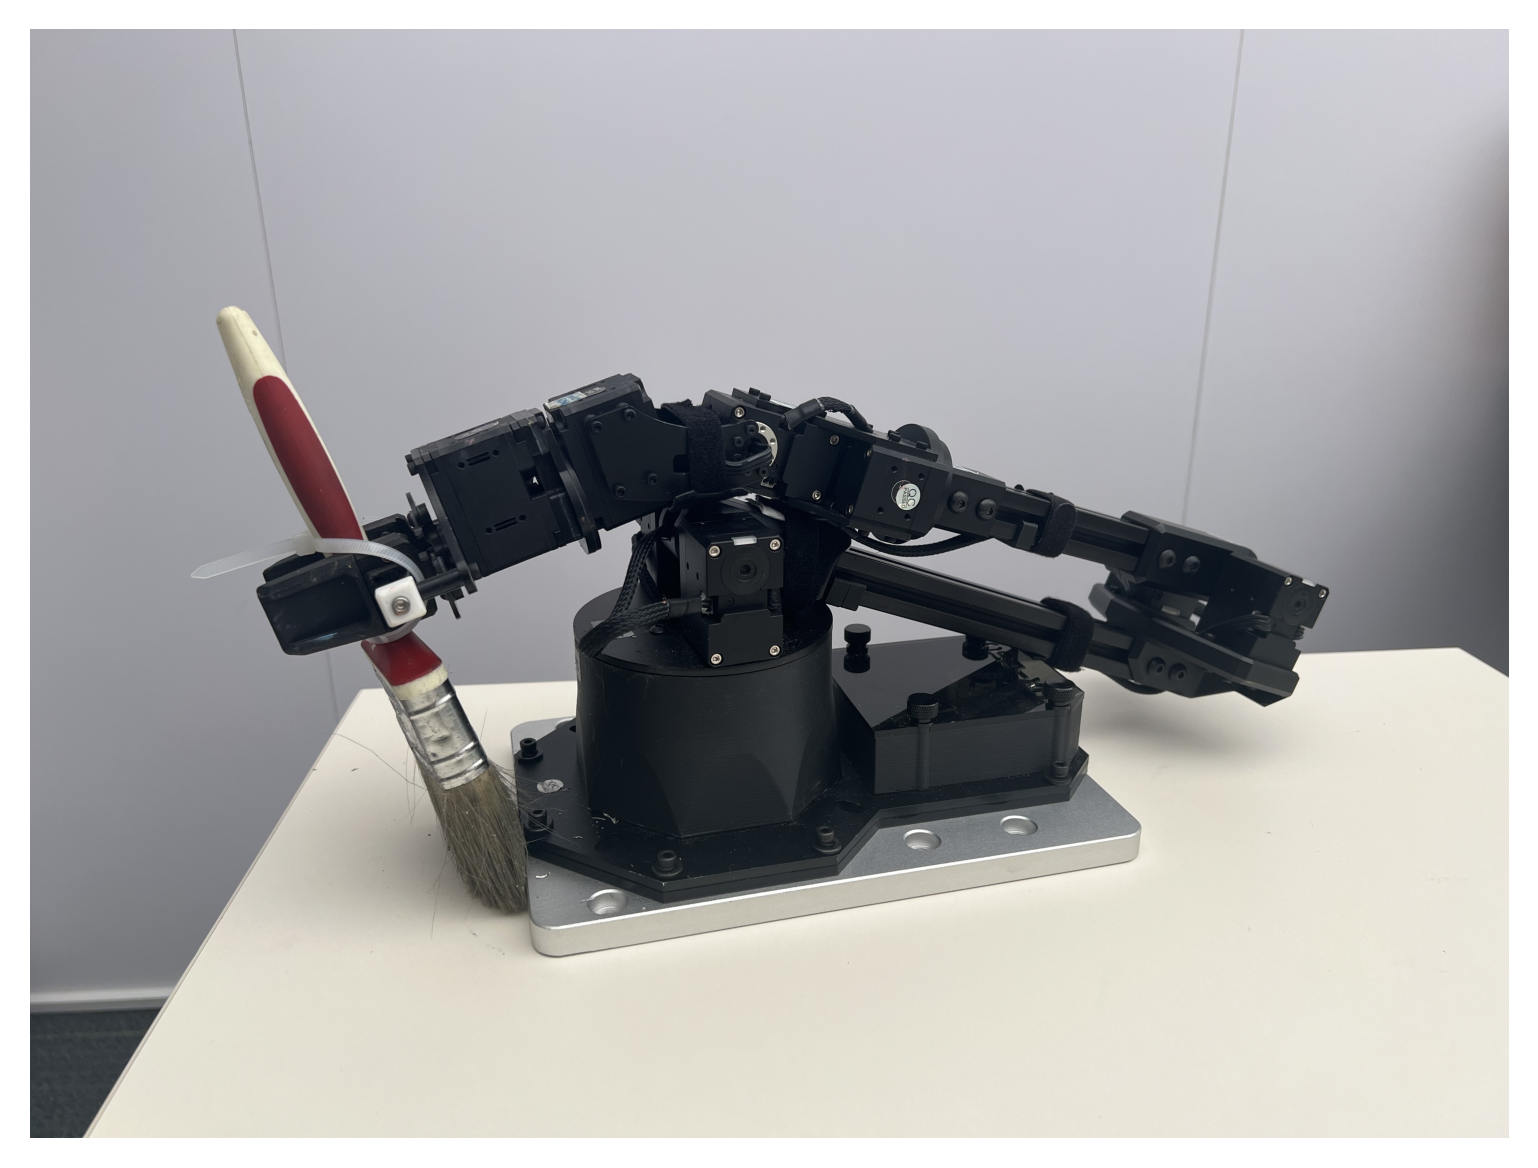

Image width: 4032, Image height: 3024


In [75]:
# Import necessary libraries
import matplotlib.pyplot as plt
from PIL import Image

# Draw the results on the image
annotated_image = results[0].plot()

# Convert the image to a format suitable for Matplotlib
annotated_image = Image.fromarray(annotated_image[..., ::-1])

# Display the image in the Jupyter Notebook
plt.rcParams['figure.dpi'] = 300
plt.imshow(annotated_image)
plt.axis('off')
plt.show()
# Print the size of the annotated image
width, height = annotated_image.size
print(f"Image width: {width}, Image height: {height}")


In [9]:
xywh

tensor([[2285.0156, 1358.0132,  631.8397,  772.0001],
        [ 789.8627,  680.4965, 1576.8600, 1353.5319],
        [1902.7991,  189.9008,  664.1499,  379.8017]], device='cuda:0')

In [6]:
xywh.cpu().detach().numpy().tolist()

[[1169.9774169921875, 2018.0146484375, 490.12017822265625, 676.6168212890625],
 [2117.96826171875, 1021.9503173828125, 2246.8681640625, 1098.0595703125]]